In [78]:
!pip install nilearn

In [79]:
# Import the Nilearn library
from nilearn import datasets
import nilearn.datasets
from nilearn.datasets import fetch_oasis_vbm
from nilearn.image import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [80]:
# Download and load Oasis “cross-sectional MRI” dataset (416 subjects).
# Gross outliers are removed and filtered by the data fetcher (DARTEL: 13 outliers).
# External variables are provided in a CSV file that is a copy of the original Oasis CSV file.

oasis_data=nilearn.datasets.fetch_oasis_vbm(n_subjects=None, dartel_version=True, data_dir=None, url=None, resume=True, verbose=1)


[get_dataset_dir] Dataset found in /root/nilearn_data/oasis1

In [81]:
# Number of subjects (based on gray matter maps)
num_subjects = len(oasis_data['gray_matter_maps'])
print(f"Number of subjects: {num_subjects}")

Number of subjects: 403


In [82]:
# Check clinical and demographic variables
import pandas as pd
ext_vars = pd.DataFrame(oasis_data['ext_vars'])
print("\nClinical/demographic variables (first few rows):")
print(ext_vars.head())


Clinical/demographic variables (first few rows):
              id mf hand  age  educ  ses  mmse  cdr  etiv   nwbv    asf  delay
0  OAS1_0001_MR1  F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306    NaN
1  OAS1_0002_MR1  F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531    NaN
2  OAS1_0003_MR1  F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207    NaN
3  OAS1_0004_MR1  M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105    NaN
4  OAS1_0005_MR1  M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010    NaN


In [83]:
# Check more rows in the DataFrame
ext_vars.head(50)

,id,mf,hand,age,educ,ses,mmse,cdr,etiv,nwbv,asf,delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


In [84]:
# Get more information about the data (data type, missing values)
ext_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 0 to 414
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      403 non-null    object 
 1   mf      403 non-null    object 
 2   hand    403 non-null    object 
 3   age     403 non-null    int64  
 4   educ    226 non-null    float64
 5   ses     207 non-null    float64
 6   mmse    226 non-null    float64
 7   cdr     226 non-null    float64
 8   etiv    403 non-null    int64  
 9   nwbv    403 non-null    float64
 10  asf     403 non-null    float64
 11  delay   0 non-null      float64
dtypes: float64(7), int64(2), object(3)
memory usage: 40.9+ KB


In [85]:
# Check the 'hand' column. Assess the handedness of participants to identify whether they are right- or left-handed.
ext_vars['hand'].value_counts()

,count
hand,
R,403


In [86]:
# Check how many not available values has the dataset
ext_vars.isna().sum()

,0
id,0
mf,0
hand,0
age,0
educ,177
ses,196
mmse,177
cdr,177
etiv,0
nwbv,0


In [87]:
# Check rows where 'cdr' is NaN and get the corresponding 'age' values
nan_adr_ages = ext_vars[ext_vars['cdr'].isna()]['age']
print(nan_adr_ages)

3      28
4      18
5      24
6      21
7      20
       ..
397    21
400    23
402    30
406    22
408    19
Name: age, Length: 177, dtype: int64


In [88]:
# Get only the 'age' values where 'cdr' is NaN
nan_adr_ages = ext_vars[ext_vars['cdr'].isna()]['age'].values

# Print all 177 values
print(nan_adr_ages)


[28 18 24 21 20 30 19 21 24 21 27 23 38 21 29 57 20 48 24 21 20 20 20 48
 18 20 25 25 18 21 40 20 18 22 28 23 19 29 18 19 24 20 20 25 23 25 19 26
 22 21 30 18 24 22 24 23 24 22 34 25 23 20 25 23 23 20 40 57 20 18 41 50
 35 23 44 48 44 22 43 21 31 23 21 23 22 20 48 18 26 22 26 19 20 22 37 20
 29 22 28 21 20 21 28 24 54 50 22 28 18 20 20 20 28 22 48 20 22 20 27 33
 31 19 27 50 19 54 26 41 19 20 23 22 43 21 22 21 20 22 23 46 31 25 20 58
 38 22 26 26 55 24 22 26 25 20 19 25 55 22 34 23 25 21 23 30 21 22 22 45
 22 50 23 22 21 23 30 22 19]


In [89]:
# Check the age of patients gouping them by 'cdr' score
for score in [0.5, 1.0, 2.0]:
    ages = ext_vars[ext_vars['cdr'] == score]['age']
    print(f"\nCDR = {score}:")
    print(ages.values)



CDR = 0.5:
[73 76 82 80 69 82 70 62 80 64 79 75 81 66 67 72 70 83 73 70 66 71 81 84
 81 80 87 75 73 78 90 77 77 74 64 90 79 80 75 89 83 71 83 72 68 84 67 73
 77 80 80 79 81 63 73 83 69 92 76 71 74 72 86 81 92 73 70 73]

CDR = 1.0:
[86 88 84 78 83 72 71 69 80 87 65 78 84 78 96 73 72 80 67 77 78 77 75 78
 71 75]

CDR = 2.0:
[78 86]


In [90]:
# Check the number of unique 'cdr' scores and the distribution of patients per score
unique_labels = ext_vars['cdr'].value_counts().sort_index()
display("cdr label distribution:")
display(unique_labels)

'cdr label distribution:'

,count
cdr,
0.0,130
0.5,68
1.0,26
2.0,2


In [91]:
# Chech the shape of the image
from nilearn.image import load_img

# Load the first image path
first_image_path = oasis_data['gray_matter_maps'][0]

# Load the Nifti image
first_image = load_img(first_image_path)

# Get the shape of the image data
image_shape = first_image.shape
print(f"Shape of the first MRI image: {image_shape}")

Shape of the first MRI image: (91, 109, 91)


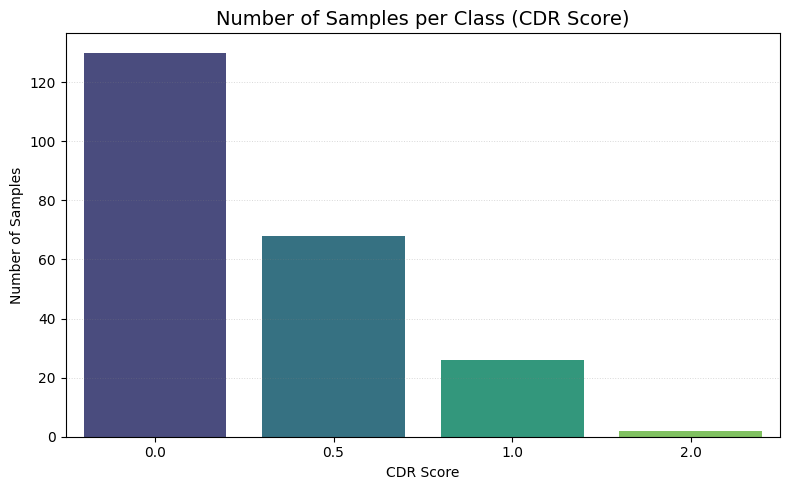

In [92]:
# Count the samples per class and prepare a DataFrame for plotting
cdr_counts = ext_vars['cdr'].value_counts().sort_index()
cdr_df = pd.DataFrame({'CDR Score': cdr_counts.index.astype(str), 'Count': cdr_counts.values})

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=cdr_df, x='CDR Score', y='Count', hue='CDR Score', palette='viridis', legend=False)
plt.title('Number of Samples per Class (CDR Score)', fontsize=14)
plt.xlabel('CDR Score')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.3, linewidth=0.7)
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("cdr_bar_plot.png", dpi=300, bbox_inches='tight')
plt.close()

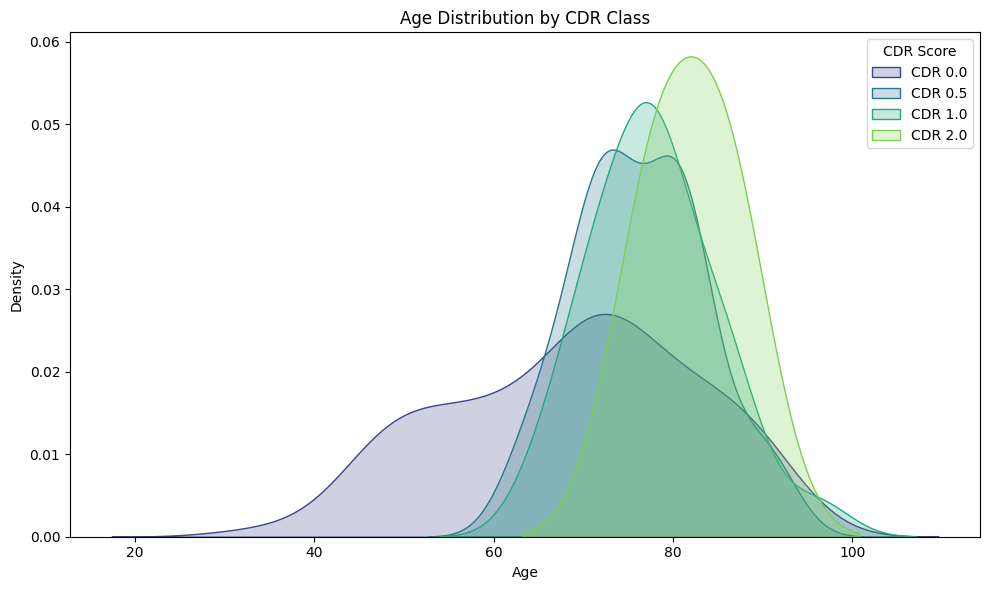

In [93]:
# Create a density plot
cdr_sorted = sorted(ext_vars['cdr'].dropna().unique())
cdr_labels = [str(cdr) for cdr in cdr_sorted]

# Create a color palette matching the number of unique CDR scores
palette = sns.color_palette('viridis', n_colors=len(cdr_labels))
cdr_color_map = dict(zip(cdr_labels, palette))

# Plot KDE curves
plt.figure(figsize=(10, 6))
for cdr_label in cdr_labels:
    sns.kdeplot(
        data=ext_vars[ext_vars['cdr'] == float(cdr_label)],
        x='age',
        fill=True,
        common_norm=False,
        color=cdr_color_map[cdr_label],
        label=f'CDR {cdr_label}')

# Legend and labels
plt.legend(title='CDR Score')
plt.title('Age Distribution by CDR Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("density_plot.png", dpi=300, bbox_inches='tight')
plt.close()

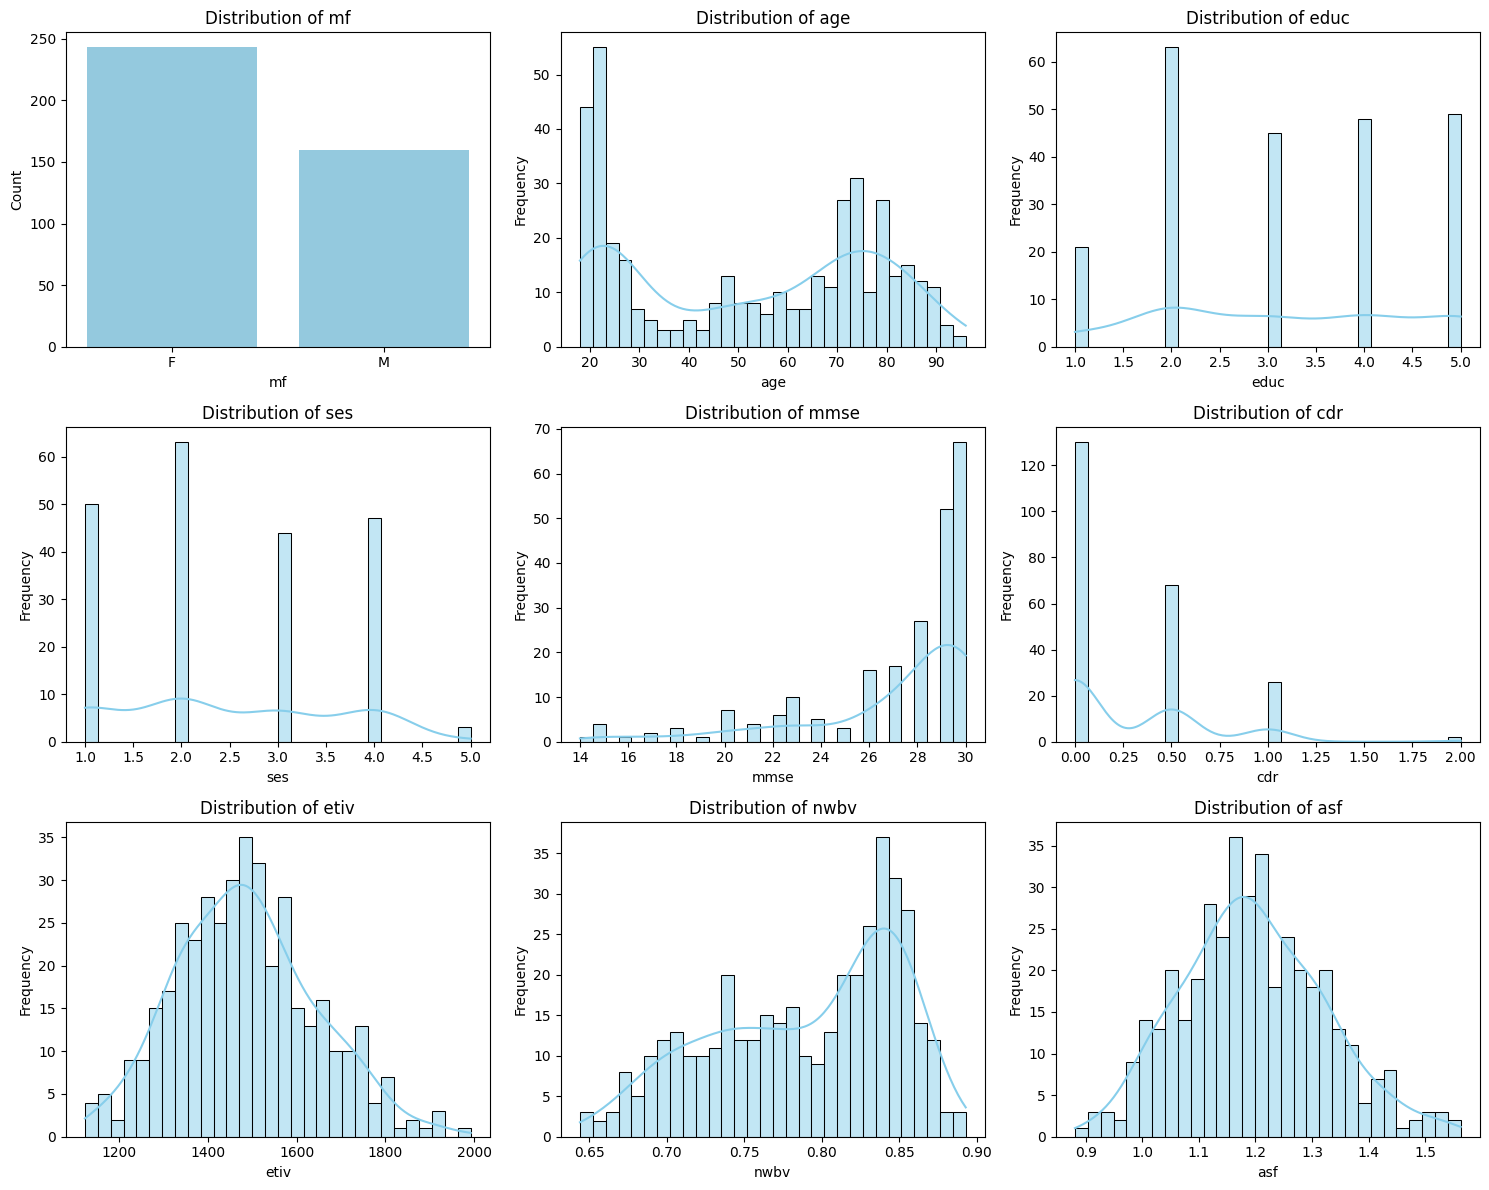

In [94]:
import seaborn as sns

# Define the features
features = ['mf', 'age', 'educ', 'ses', 'mmse', 'cdr', 'etiv', 'nwbv', 'asf']

# Set grid size
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)

    if col == 'mf':
        sns.countplot(data=ext_vars, x=col, color='skyblue')   # Countplot for categorical variable with light blue bars
        plt.ylabel("Count")
    else:
        sns.histplot(ext_vars[col].dropna(), kde=True, bins=30, color='skyblue')    # Histogram + KDE for numerical variables
        plt.ylabel("Frequency")

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Save the visalizations
plt.savefig("histograms.png", dpi=300, bbox_inches='tight')
plt.close()


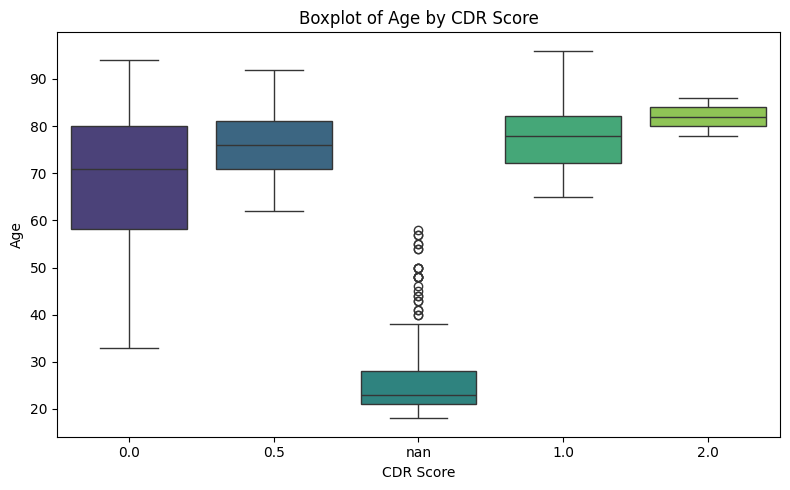

In [95]:
# Convert 'cdr' to string for labeling
ext_vars['cdr_str'] = ext_vars['cdr'].astype(str)

# Prepare color palette
cdr_order = sorted(ext_vars['cdr'].unique())
cdr_labels = [str(cdr) for cdr in cdr_order]
palette = sns.color_palette('viridis', n_colors=len(cdr_labels))
cdr_color_map = dict(zip(cdr_labels, palette))

# Plot the boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='cdr_str',
    y='age',
    hue='cdr_str',
    data=ext_vars,
    palette=cdr_color_map,
    order=cdr_labels,
    dodge=False,
    legend=False)

plt.title('Boxplot of Age by CDR Score')
plt.xlabel('CDR Score')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("boxplots.png", dpi=300, bbox_inches='tight')
plt.close()


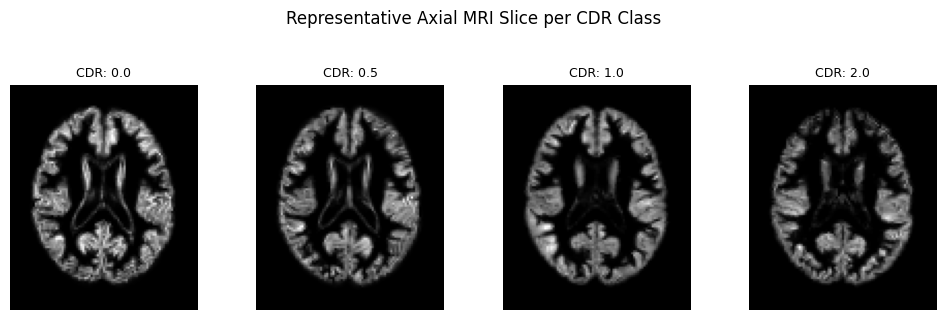

In [96]:
import nibabel as nib

# Get sorted unique 'cdr' classes
unique_classes = sorted(ext_vars['cdr'].dropna().unique())

# Create subplots
fig, axes = plt.subplots(1, len(unique_classes), figsize=(10, 3))

# Plot one representative image per class
for i, cls in enumerate(unique_classes):
    subset = ext_vars[ext_vars['cdr'] == cls]
    if subset.empty:
        print(f"No image found for CDR = {cls}")
        continue

    idx = subset.index[0]
    img_path = oasis_data.gray_matter_maps[idx]

    img = nib.load(img_path)
    data = img.get_fdata()
    slice_ = data[:, :, data.shape[2] // 2]

    axes[i].imshow(np.rot90(slice_), cmap="gray")
    axes[i].set_title(f'CDR: {cls}', fontsize=9)
    axes[i].axis("off")

# Title and save
plt.suptitle("Representative Axial MRI Slice per CDR Class", fontsize=12, y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig("cdr_examples.png", dpi=300, bbox_inches='tight')


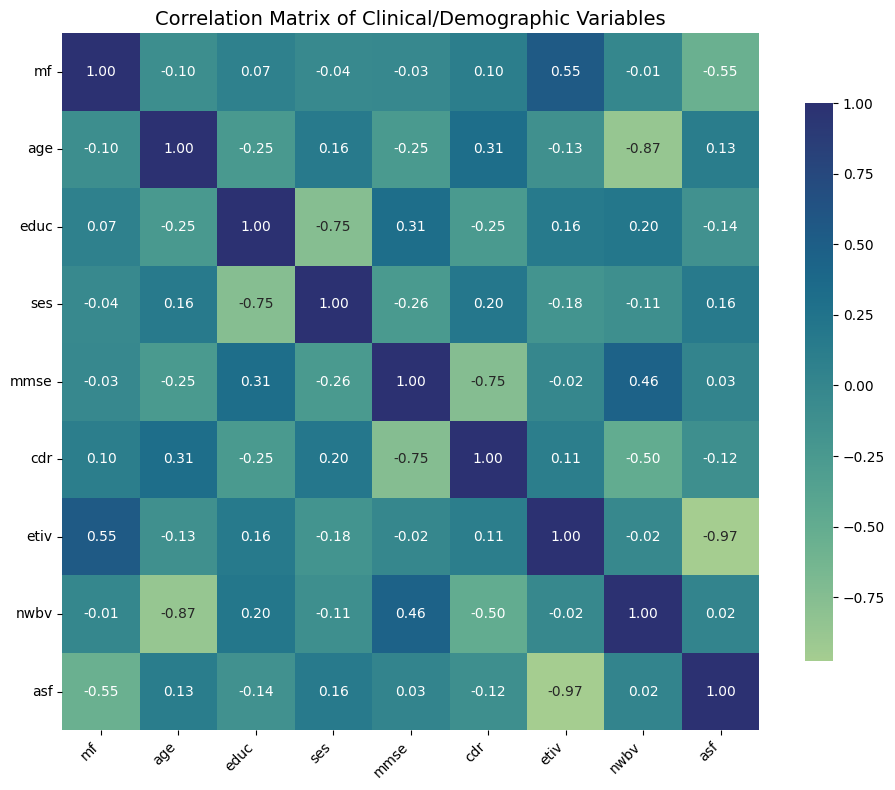

In [97]:
# Drop 'delay' column
metadata_cleaned = ext_vars.drop(columns=['delay'], errors='ignore')

# Convert 'mf' to binary: M = 1, F = 0
metadata_cleaned['mf'] = metadata_cleaned['mf'].map({'M': 1, 'F': 0})

# Define the correct variable order
ordered_cols = ['mf', 'age', 'educ', 'ses', 'mmse', 'cdr', 'etiv', 'nwbv', 'asf']

# Ensure only numeric columns are included
numerical_cols = [col for col in ordered_cols if col in metadata_cleaned.columns and metadata_cleaned[col].dtype in ['float64', 'int64']]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    metadata_cleaned[numerical_cols].corr().loc[ordered_cols, ordered_cols],
    annot=True,
    cmap='crest',
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Clinical/Demographic Variables', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save and show the plot
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()


**Transform the task in a binary classification problem.**

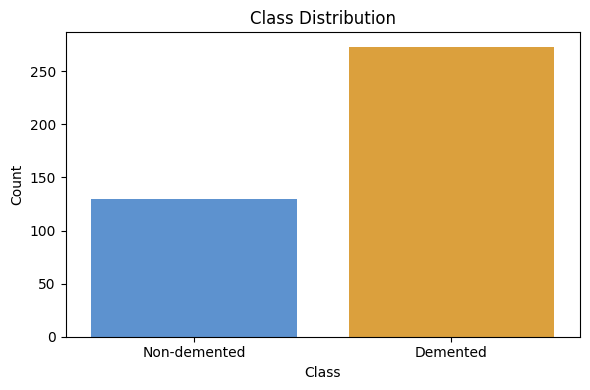

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create binary class labels
ext_vars['cdr_binary'] = ext_vars['cdr'].apply(lambda x: 'Non-demented' if x == 0.0 else 'Demented')

# Define the color palette, create the figure and define the axes
soft_palette = {'Non-demented': '#4A90E2', 'Demented': '#F5A623'}  # Softer blue & orange
plt.figure(figsize=(6, 4))
sns.countplot(data=ext_vars, x='cdr_binary', hue='cdr_binary', palette=soft_palette)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("binary_bar_chart.png", dpi=300)
plt.close()

In [99]:
# Count the number of people in each class
class_counts = ext_vars['cdr'].apply(lambda x: 1 if x > 0 else 0).value_counts().sort_index()
print("Class Counts:")
print(f"Non-demented: {class_counts[0]}")
print(f"Demented: {class_counts[1]}")

Class Counts:
Non-demented: 307
Demented: 96


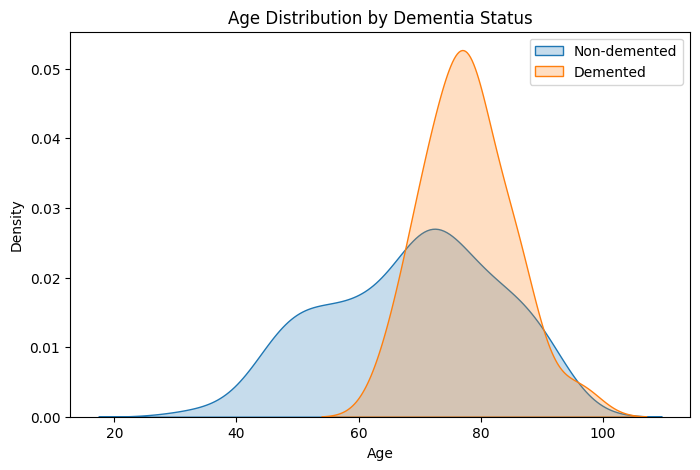

In [100]:
# Age distribution by class
plt.figure(figsize=(8, 5))
sns.kdeplot(data=ext_vars[ext_vars['cdr'] == 0]['age'], label='Non-demented', fill=True)
sns.kdeplot(data=ext_vars[ext_vars['cdr'] == 1]['age'], label='Demented', fill=True)
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Age')
plt.legend()
plt.show()

# Save the figure
plt.savefig("age_vs_dementia.png", dpi=300)
plt.close()

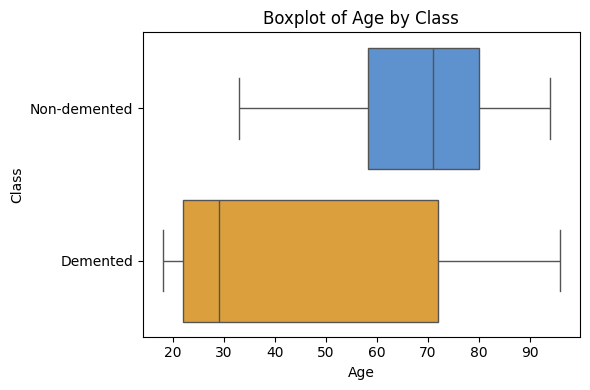

In [101]:
# Define the soft color palette
soft_palette = {'Non-demented': '#4A90E2', 'Demented': '#F5A623'}

# Plot the boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='age', y='cdr_binary', data=ext_vars, palette=soft_palette, hue='cdr_binary')
plt.title('Boxplot of Age by Class')
plt.xlabel('Age')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("boxplots_binary", dpi=300)
plt.close()


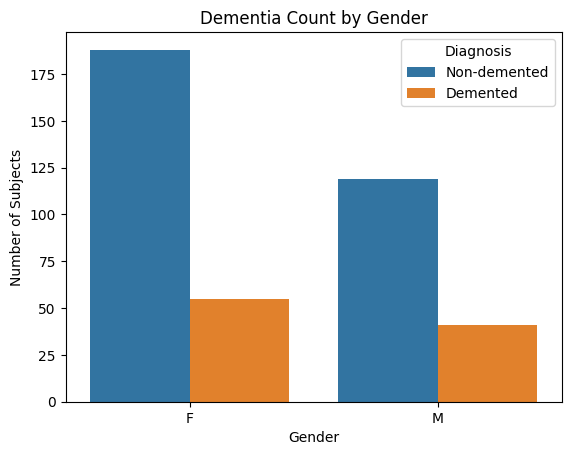

In [102]:
# Create a new 'Group' column to classify subjects as 'Demented' or 'Non-demented' based on CDR scores.
# Then visualize the distribution of dementia cases by gender using a count plot.

ext_vars['Group'] = ext_vars['cdr'].apply(lambda x: 'Demented' if x > 0 else 'Non-demented')

sns.countplot(data=ext_vars, x='mf', hue='Group')
plt.title('Dementia Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Subjects')
plt.legend(title='Diagnosis')
plt.show()

# Save the figure
plt.savefig("gender_dementia.png", dpi=300)
plt.close()


# Conclusion: Men are more prone than women to dementia disease.

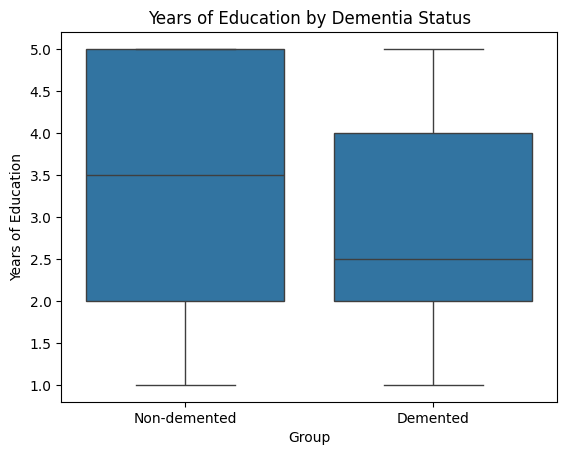

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Demented,96.0,2.833333,1.278705,1.0,2.0,2.5,4.0,5.0
Non-demented,130.0,3.438462,1.269828,1.0,2.0,3.5,5.0,5.0


In [103]:
# Compare years of education between demented and non-demented groups using a boxplot.

sns.boxplot(data=ext_vars, x='Group', y='educ')
plt.title('Years of Education by Dementia Status')
plt.xlabel('Group')
plt.ylabel('Years of Education')
plt.show()

display(ext_vars.groupby('Group')['educ'].describe())   # display summary statistics to support visual observations

# Save the figure
plt.savefig("educ_vs_dementia.png", dpi=300)
plt.close()


# Conclusion: Demented patients had fewer years of education than healthy people.


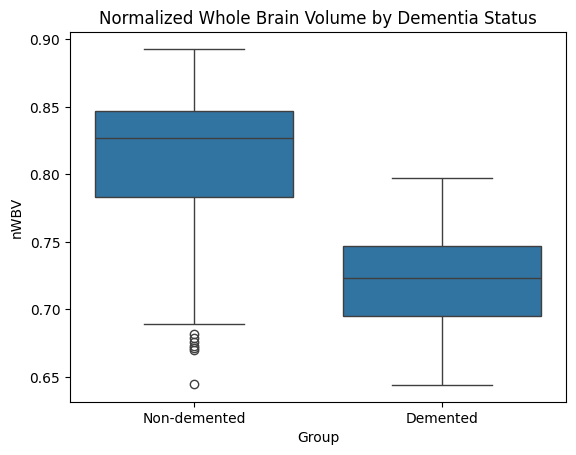

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Demented,96.0,0.722323,0.035935,0.644,0.69475,0.723,0.74725,0.797
Non-demented,307.0,0.811169,0.049746,0.645,0.78300,0.827,0.84700,0.893


In [104]:
# Visualize and compare normalized whole brain volume (nWBV) between demented and non-demented groups using boxplots.

sns.boxplot(data=ext_vars, x='Group', y='nwbv')
plt.title('Normalized Whole Brain Volume by Dementia Status')
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

display(ext_vars.groupby('Group')['nwbv'].describe())   #  display descriptive statistics to examine differences in brain volume by dementia status

# Save the figure
plt.savefig("nwbv_vs_dementia.png", dpi=300)
plt.close()

# Conclusion: Compared to the Demented group, the Nondemented group had a larger brain volume.

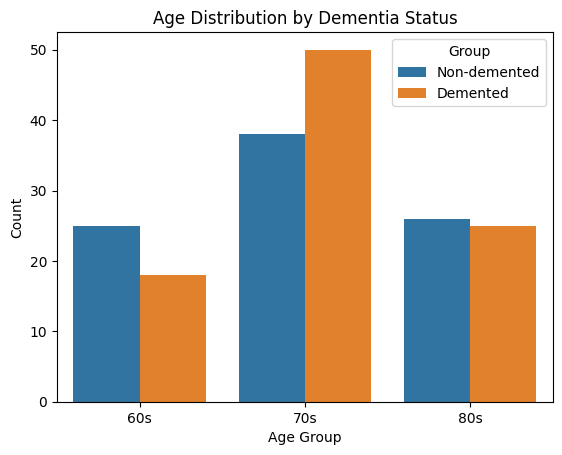

Group,Demented,Non-demented
AgeGroup,,
60s,41.860465,58.139535
70s,56.818182,43.181818
80s,49.019608,50.980392


In [105]:
# Categorize subjects into age groups (60s, 70s, 80s), visualize the distribution of dementia status within each age group.
# And calculate the percentage of demented individuals per age group to highlight age-related trends in dementia prevalence.

# Create age bins
ext_vars['AgeGroup'] = pd.cut(ext_vars['age'], bins=[60, 70, 80, 90], labels=['60s', '70s', '80s'])

sns.countplot(data=ext_vars, x='AgeGroup', hue='Group')
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

# Percentage of demented per age group
age_dementia_pct = pd.crosstab(ext_vars['AgeGroup'], ext_vars['Group'], normalize='index') * 100
display(age_dementia_pct)

# Save the figure
plt.savefig("age_group_dementia.png", dpi=300)
plt.close()

# Conclusion: Compared to Demented and non-demented patients, demented have a higher proportion of people in their 70s and 80s


**Pre-Processing**

In [106]:
# Import the necessary libraries

from nilearn.datasets import fetch_oasis_vbm
from nilearn.image import load_img
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn.maskers import NiftiMasker
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer



In [107]:
# Fetch the Oasis VBM dataset
oasis_data=nilearn.datasets.fetch_oasis_vbm(n_subjects=None, dartel_version=True)

[get_dataset_dir] Dataset found in /root/nilearn_data/oasis1

In [108]:
# Load the DataFrame with clinical and demographic variables
ext_vars = pd.DataFrame(oasis_data['ext_vars'])

In [109]:
# Load external variables
#ext_vars = oasis_data.ext_vars.copy()

# Set 'id' column as index
ext_vars = ext_vars.set_index('id')

# Drop 'hand' and 'delay' columns
# Drop 'hand' and 'delay' columns
# The 'hand' column is excluded because all subjects are right-handed, offering no variability or discriminatory power.
# The 'delay' column is removed as it consists entirely of Nans, providing no information for the analysis.
ext_vars = ext_vars.drop(columns=['hand', 'delay'], errors='ignore')

# Set all NaN values in 'cdr' to 0.0
ext_vars['cdr'] = ext_vars['cdr'].fillna(0.0)

# Impute 'mmse', 'ses', and 'educ' with their median values
median_imputer = SimpleImputer(strategy='median')
for col in ['mmse', 'ses', 'educ']:
    ext_vars[[col]] = median_imputer.fit_transform(ext_vars[[col]])

# Ensure 'etiv' is an integer after imputation
ext_vars['etiv'] = ext_vars['etiv'].astype(int)

# Encode the 'mf' column (sex: Male/Female) to numerical values
label_encoder = LabelEncoder()
ext_vars['mf'] = label_encoder.fit_transform(ext_vars['mf'])

# Convert 'cdr' into a binary variable (0.0 == 0, 0.5/1.0/2.0 == 1)
ext_vars['cdr'] = ext_vars['cdr'].apply(lambda x: 0 if x == 0.0 else 1).astype(int)

# Reset index after processing
ext_vars.reset_index(drop=True, inplace=True)

# Check results
print(ext_vars.dtypes)
print(ext_vars.head())

mf        int64
age       int64
educ    float64
ses     float64
mmse    float64
cdr       int64
etiv      int64
nwbv    float64
asf     float64
dtype: object
   mf  age  educ  ses  mmse  cdr  etiv   nwbv    asf
0   0   74   2.0  3.0  29.0    0  1344  0.743  1.306
1   0   55   4.0  1.0  29.0    0  1147  0.810  1.531
2   0   73   4.0  3.0  27.0    1  1454  0.708  1.207
3   1   28   3.0  2.0  29.0    0  1588  0.803  1.105
4   1   18   3.0  2.0  29.0    0  1737  0.848  1.010


Pre-Processing step for Random Forest

In [110]:
# Process gray matter maps
nifti_masker = NiftiMasker(standardize=False, smoothing_fwhm=2, memory="nilearn_cache")
gm_maps_masked = nifti_masker.fit_transform(oasis_data.gray_matter_maps)

In [73]:
# Feature selection: remove low-variance voxels
variance_threshold = VarianceThreshold(threshold=0.01)
gm_maps_masked_filtered = variance_threshold.fit_transform(gm_maps_masked)

In [74]:
# Create voxel-level feature DataFrame
voxel_columns = [f"voxel_{i}" for i in range(gm_maps_masked_filtered.shape[1])]
X_df = pd.DataFrame(gm_maps_masked_filtered, columns=voxel_columns)

In [75]:
# Combine clinical and voxel data
final_df = pd.concat([ext_vars.reset_index(drop=True), X_df.reset_index(drop=True)], axis=1)

In [76]:
# Data split and standardization
from sklearn.model_selection import train_test_split

# Create a list with the features
clinical_features = ['mf', 'age', 'educ', 'ses', 'mmse', 'etiv', 'nwbv', 'asf']
all_features = clinical_features + voxel_columns

# Target
X = final_df[all_features]
y = final_df['cdr']

# Split into train+val and test (80/20 stratified)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split train+val into train and val (80/20 stratified)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

print("\nData splits:")
print(f"Train: {X_train.shape[0]} samples")
print(f"Val: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# Define the preprocessor: scale clinical features, pass voxels unchanged
preprocessor = ColumnTransformer(transformers=[('clinical', StandardScaler(), clinical_features),('voxels', 'passthrough', voxel_columns)])

# Fit scaler on training data only and transform val, test
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)




Data splits:
Train: 257 samples
Val: 65 samples
Test: 81 samples
